In [99]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, recall_score

In [3]:
df = pd.read_excel("../data/brote_dengue.xlsx")
df.columns = ["Temp_Seca_Max","Precipitacion","Temp_Seca_Min","Hum_Rel_Min","Hum_Rel_Max","brote","Dengue"]
df["brote"] = df["brote"].replace(["NO","SI"],[0,1])
df = df.dropna()
df

,Temp_Seca_Max,Precipitacion,Temp_Seca_Min,Hum_Rel_Min,Hum_Rel_Max,brote,Dengue
0,25.866667,3.700000,19.433333,47.500000,91.666667,0,2
1,28.200000,0.000000,20.800000,40.833333,91.333333,0,2
2,29.066667,0.033333,20.933333,45.333333,94.333333,0,1
3,30.266667,11.133333,20.500000,57.833333,92.000000,0,1
4,28.133333,1.016667,18.600000,50.833333,89.166667,0,2
...,...,...,...,...,...,...,...
93,28.200000,2.783333,20.066667,46.833333,86.500000,0,22
94,27.066667,7.050000,20.966667,49.500000,87.666667,0,18
95,28.933333,4.350000,20.933333,44.166667,87.666667,0,17
96,29.933333,0.733333,20.700000,45.000000,87.500000,0,14


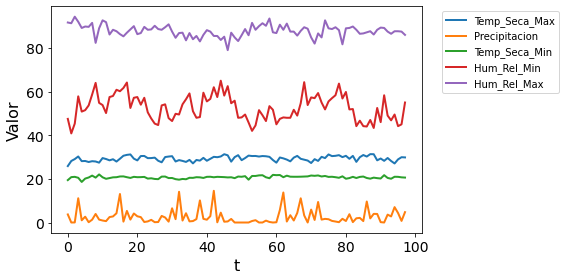

In [86]:

values = df.Temp_Seca_Max.values
xx = np.arange(values.shape[0])
fig, ax = plt.subplots(figsize=(8,4))
for col in df.columns[:-2]:
    plt.plot(xx,df[col].values, 
             linewidth = 2,             
            # marker = 'o',
            markersize = 6,
            label = col)
plt.legend(bbox_to_anchor = (1.04,1))
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.xlabel('t', fontsize = 16)    
plt.ylabel('Valor', fontsize = 16)  
# plt.legend()
plt.tight_layout()
plt.savefig("outputs/series_variables_predictoras.pdf", dpi = 200)
plt.show()



In [101]:
def logistic_with(df,slag, seed = 42, shuffle = True):
    X = df[["Temp_Seca_Max","Precipitacion","Temp_Seca_Min","Hum_Rel_Min","Hum_Rel_Max"]].values
    y = df["brote"].values

    n_samples,n_features = X.shape

    #Se hace el ventaneo para obtener los datos de entrenamiento
    new_X = []
    for i in range(0,n_samples - slag ):
        X_raveled = X[i:i+slag,:].ravel()
        new_X.append(X_raveled)
    new_X = np.array(new_X)
    new_y = y[slag:]

    print(f'Utilizando un Slag de {slag} tenemos X: {new_X.shape} y: {new_y.shape}')
    X_train, X_test, y_train, y_test = train_test_split(new_X, new_y, 
                                                        test_size=0.20, 
                                                        random_state=seed,
                                                        shuffle = shuffle)
    print(f'Test (20%): {X_test.shape[0]}')
    clf = LogisticRegression(random_state=seed,
                             max_iter=1000).fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    return y_test, y_pred


    

In [105]:
def varying_slag(li, ls, step = 1, shuffle = True):
    performance = {"slag":[], 
                "accuracy":[],
                "recall": []}
    for i in range(li,ls,step):
        performance["slag"].append(i)
        y_test, y_pred = logistic_with(df, 
                                    slag = i, 
                                    shuffle = shuffle)
        acc = accuracy_score(y_test, y_pred)
        recc = recall_score(y_test,y_pred)
        performance["accuracy"].append(acc)
        performance["recall"].append(recc)
    performance = pd.DataFrame(performance)
    performance["sem"] = performance["slag"] / 7
    return performance

def plot_performance(performance, col = "accuracy"):
    fig, ax = plt.subplots(figsize=(6,4))
    plt.grid()
    plt.plot(performance["slag"],performance[col], 
             linewidth = 2.5, 
             c = "#cb4d4d",
             marker = 'o',
             markersize = 8)
    ax.set_xticks(list(performance["slag"]))
    plt.xticks(fontsize=14)
    plt.yticks(fontsize=14)
    plt.xlabel('Lag', fontsize = 16)    
    plt.ylabel(f'{col} (%)', fontsize = 16)  
    plt.tight_layout()
    

Utilizando un Slag de 7 tenemos X: (91, 35) y: (91,)
Test (20%): 19
Utilizando un Slag de 14 tenemos X: (84, 70) y: (84,)
Test (20%): 17
Utilizando un Slag de 21 tenemos X: (77, 105) y: (77,)
Test (20%): 16
Utilizando un Slag de 28 tenemos X: (70, 140) y: (70,)
Test (20%): 14
Utilizando un Slag de 35 tenemos X: (63, 175) y: (63,)
Test (20%): 13


/Users/juanolmos/opt/anaconda3/envs/dl/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/juanolmos/opt/anaconda3/envs/dl/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/juanolmos/opt/anaconda3/envs/dl/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


Utilizando un Slag de 42 tenemos X: (56, 210) y: (56,)
Test (20%): 12
Utilizando un Slag de 49 tenemos X: (49, 245) y: (49,)
Test (20%): 10
Utilizando un Slag de 56 tenemos X: (42, 280) y: (42,)
Test (20%): 9
Utilizando un Slag de 63 tenemos X: (35, 315) y: (35,)
Test (20%): 7
Utilizando un Slag de 70 tenemos X: (28, 350) y: (28,)
Test (20%): 6


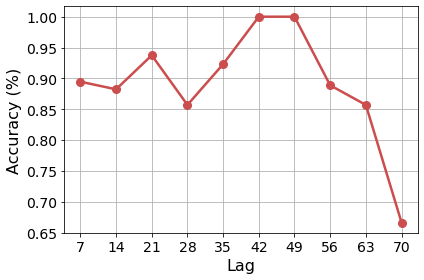

In [103]:
performance = varying_slag(li=7,ls=71,step=7,shuffle=True)
plot_performance(performance)
plt.show()


Utilizando un Slag de 7 tenemos X: (91, 35) y: (91,)
Test (20%): 19
Utilizando un Slag de 14 tenemos X: (84, 70) y: (84,)
Test (20%): 17
Utilizando un Slag de 21 tenemos X: (77, 105) y: (77,)
Test (20%): 16
Utilizando un Slag de 28 tenemos X: (70, 140) y: (70,)
Test (20%): 14
Utilizando un Slag de 35 tenemos X: (63, 175) y: (63,)
Test (20%): 13
Utilizando un Slag de 42 tenemos X: (56, 210) y: (56,)
Test (20%): 12
Utilizando un Slag de 49 tenemos X: (49, 245) y: (49,)
Test (20%): 10
Utilizando un Slag de 56 tenemos X: (42, 280) y: (42,)
Test (20%): 9
Utilizando un Slag de 63 tenemos X: (35, 315) y: (35,)
Test (20%): 7
Utilizando un Slag de 70 tenemos X: (28, 350) y: (28,)
Test (20%): 6
Utilizando un Slag de 77 tenemos X: (21, 385) y: (21,)
Test (20%): 5
Utilizando un Slag de 84 tenemos X: (14, 420) y: (14,)
Test (20%): 3


/Users/juanolmos/opt/anaconda3/envs/dl/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/juanolmos/opt/anaconda3/envs/dl/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/juanolmos/opt/anaconda3/envs/dl/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/juanolmos/opt/anaconda3/envs/dl/lib/python3.9/site-packages/skl

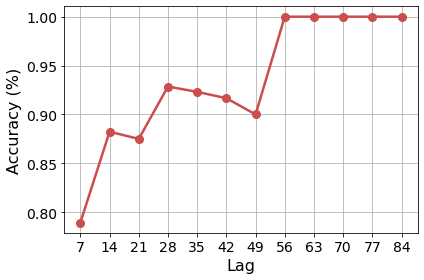

In [104]:
performance = varying_slag(li=7,ls=85,step=7,shuffle=False)
plot_performance(performance)
# plt.savefig("outputs/logistic_varying_slag.pdf", dpi = 200)
plt.show()


Utilizando un Slag de 7 tenemos X: (91, 35) y: (91,)
Test (20%): 19
Utilizando un Slag de 14 tenemos X: (84, 70) y: (84,)
Test (20%): 17
Utilizando un Slag de 21 tenemos X: (77, 105) y: (77,)
Test (20%): 16
Utilizando un Slag de 28 tenemos X: (70, 140) y: (70,)
Test (20%): 14
Utilizando un Slag de 35 tenemos X: (63, 175) y: (63,)
Test (20%): 13
Utilizando un Slag de 42 tenemos X: (56, 210) y: (56,)
Test (20%): 12
Utilizando un Slag de 49 tenemos X: (49, 245) y: (49,)
Test (20%): 10
Utilizando un Slag de 56 tenemos X: (42, 280) y: (42,)
Test (20%): 9
Utilizando un Slag de 63 tenemos X: (35, 315) y: (35,)
Test (20%): 7
Utilizando un Slag de 70 tenemos X: (28, 350) y: (28,)
Test (20%): 6
Utilizando un Slag de 77 tenemos X: (21, 385) y: (21,)
Test (20%): 5
Utilizando un Slag de 84 tenemos X: (14, 420) y: (14,)
Test (20%): 3


/Users/juanolmos/opt/anaconda3/envs/dl/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/juanolmos/opt/anaconda3/envs/dl/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/juanolmos/opt/anaconda3/envs/dl/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 due to no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/juanolmos/opt/anaconda3/envs/dl/lib/python3.9/site-packages/skl

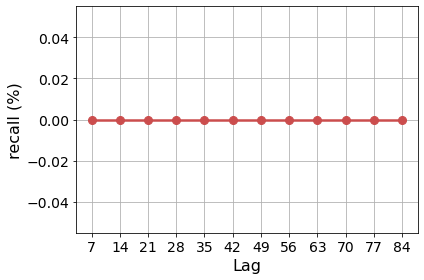

In [106]:
performance = varying_slag(li=7,ls=85,step=7,shuffle=False)
plot_performance(performance, col = "recall")
# plt.savefig("outputs/logistic_varying_slag.pdf", dpi = 200)
plt.show()
